# Importing necessary libraries

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
import io
import requests
from datetime import datetime, timedelta
import matplotlib.ticker as mtick

# Configure visualizations

In [14]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # OpenMP threads
os.environ["OPENBLAS_NUM_THREADS"] = "1"  # OpenBLAS threads
os.environ["MKL_NUM_THREADS"] = "1"  # MKL threads

In [15]:
plt.style.use('seaborn-paper')
sns.set_palette('viridis')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [16]:
# Set random seed for reproducibility
np.random.seed(42)

# Importing Dataset

In [17]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# data (as pandas dataframes) 
X = online_retail.data.features 
y = online_retail.data.targets 

In [18]:
# metadata 
print(online_retail.metadata) 

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

In [19]:
# variable information 
print(online_retail.variables) 

          name     role         type demographic  \
0    InvoiceNo       ID  Categorical        None   
1    StockCode       ID  Categorical        None   
2  Description  Feature  Categorical        None   
3     Quantity  Feature      Integer        None   
4  InvoiceDate  Feature         Date        None   
5    UnitPrice  Feature   Continuous        None   
6   CustomerID  Feature  Categorical        None   
7      Country  Feature  Categorical        None   

                                         description     units missing_values  
0  a 6-digit integral number uniquely assigned to...      None             no  
1  a 5-digit integral number uniquely assigned to...      None             no  
2                                       product name      None             no  
3  the quantities of each product (item) per tran...      None             no  
4  the day and time when each transaction was gen...      None             no  
5                             product price per uni

In [20]:
X

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [21]:
print(y)

None


In [22]:
retail_data = online_retail.data.original
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Exploration

In [23]:
print("Dataset Shape:", retail_data.shape)

Dataset Shape: (541909, 8)


In [24]:
print("Dataset Info:")
retail_data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Exploratory Data Analysis 

In [25]:
# Check for missing values
print("Missing values in each column:")
print(retail_data.isnull().sum())

Missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [26]:
# Summary statistics
print("\nSummary statistics:")
retail_data.describe()


Summary statistics:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

In [27]:
# Make a copy of the original dataset
df = retail_data.copy()

In [28]:
# Convert InvoiceDate to datetime format (if not already)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [29]:
# Remove rows with missing CustomerID
df_clean = df.dropna(subset=['CustomerID'])
print(f"Rows after removing missing CustomerID: {df_clean.shape[0]} (removed {df.shape[0] - df_clean.shape[0]} rows)")

Rows after removing missing CustomerID: 406829 (removed 135080 rows)


In [30]:
# Convert CustomerID to integer type
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

In [31]:
# Filter out canceled transactions (where InvoiceNo starts with 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]
print(f"Rows after removing canceled transactions: {df_clean.shape[0]}")

Rows after removing canceled transactions: 397924


In [32]:
# Keep only transactions from the United Kingdom
df_clean = df_clean[df_clean['Country'] == 'United Kingdom']
print(f"Rows after filtering for UK only: {df_clean.shape[0]}")

Rows after filtering for UK only: 354345


In [33]:
# Remove transactions with negative or zero quantity or unit price
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
print(f"Rows after removing negative or zero quantity/price: {df_clean.shape[0]}")

Rows after removing negative or zero quantity/price: 354321


In [34]:
# Check the cleaned dataset
print("\nCleaned dataset information:")
df_clean.info()


Cleaned dataset information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  int32         
 7   Country      354321 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 23.0+ MB


In [35]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# RFM Feature Engineering

In [36]:
# Calculate total amount spent per transaction
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [37]:
# Set the snapshot date as one day after the last transaction date
snapshot_date = df_clean['InvoiceDate'].max() + timedelta(days=1)
print(f"Snapshot date for RFM calculation: {snapshot_date.date()}")

Snapshot date for RFM calculation: 2011-12-10


In [38]:
# Calculate Recency, Frequency, and Monetary value for each customer
# Recency: days since last purchase
recency_df = df_clean.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df.columns = ['CustomerID', 'LastPurchaseDate']
recency_df['Recency'] = (snapshot_date - recency_df['LastPurchaseDate']).dt.days

In [39]:
# Frequency: number of invoices (transactions)
frequency_df = df_clean.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']


In [40]:
# Monetary: total revenue
monetary_df = df_clean.groupby('CustomerID')['TotalAmount'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']


In [41]:
# Merge all RFM features into a single DataFrame
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

In [42]:
# Keep only the necessary columns for RFM analysis
rfm_df = rfm_df[['CustomerID', 'Recency', 'Frequency', 'Monetary']]

In [43]:
print("RFM DataFrame shape:", rfm_df.shape)

RFM DataFrame shape: (3920, 4)


In [44]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,2,11,4196.01
2,12748,1,209,33719.73
3,12749,4,5,4090.88
4,12820,3,4,942.34


# Visualization

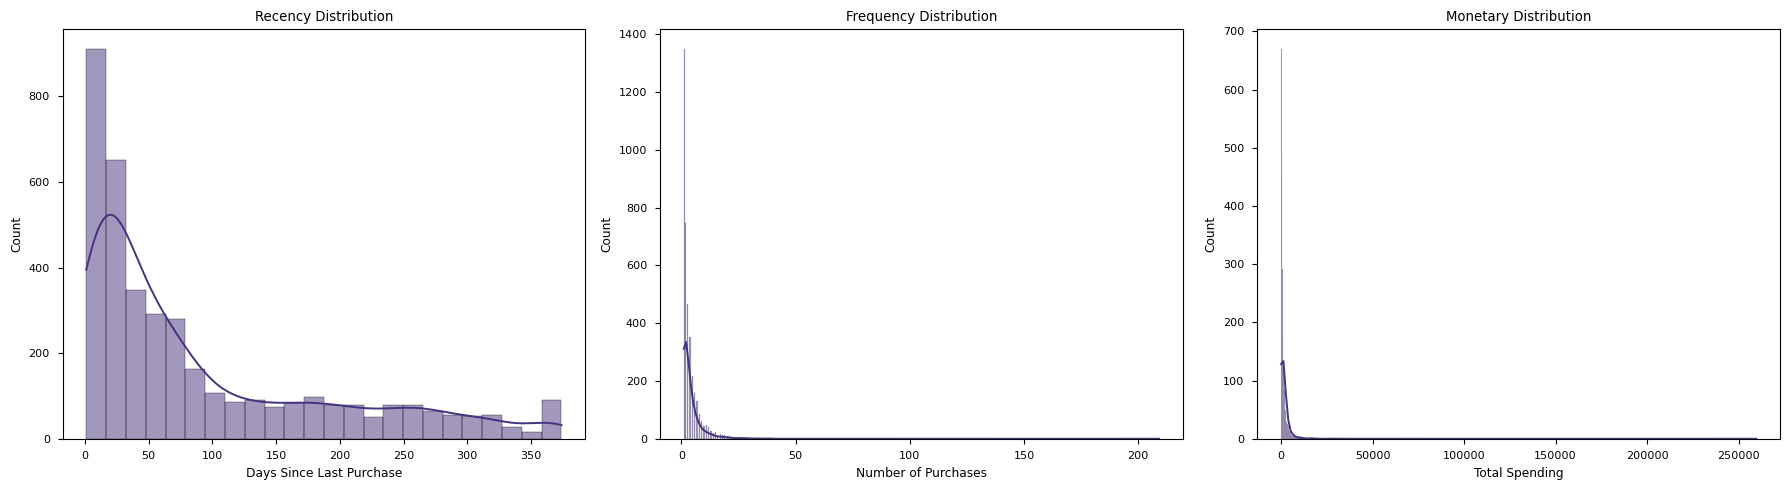

In [45]:
# Visualize the distribution of RFM features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency distribution
sns.histplot(rfm_df['Recency'], kde=True, ax=axes[0])
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days Since Last Purchase')

# Frequency distribution
sns.histplot(rfm_df['Frequency'], kde=True, ax=axes[1])
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Purchases')

# Monetary distribution
sns.histplot(rfm_df['Monetary'], kde=True, ax=axes[2])
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total Spending')

plt.tight_layout()
plt.show()

In [46]:
# Display summary statistics of RFM features
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,92.208418,4.246429,1864.385601
std,1576.594671,99.533854,7.199202,7482.817477
min,12346.000000,1.000000,1.000000,3.750000
25%,14208.750000,18.000000,1.000000,300.280000
50%,15569.500000,51.000000,2.000000,652.280000
75%,16913.250000,143.000000,5.000000,1576.585000
max,18287.000000,374.000000,209.000000,259657.300000


# Feature Transformation & Scaling

In [47]:
# Log transformation for highly skewed features
# Create a copy of the RFM DataFrame for transformation
rfm_transformed = rfm_df.copy()

In [48]:
# Apply log transformation to Monetary value (adding 1 to avoid log(0))
rfm_transformed['Monetary_Log'] = np.log1p(rfm_transformed['Monetary'])

In [49]:
# Apply log transformation to Frequency if highly skewed
if rfm_transformed['Frequency'].skew() > 1:
    rfm_transformed['Frequency_Log'] = np.log1p(rfm_transformed['Frequency'])
    print(f"Frequency skewness before log transform: {rfm_transformed['Frequency'].skew():.4f}")
    print(f"Frequency skewness after log transform: {rfm_transformed['Frequency_Log'].skew():.4f}")
    # Use the log-transformed frequency
    rfm_features = rfm_transformed[['Recency', 'Frequency_Log', 'Monetary_Log']]
else:
    # If Frequency is not highly skewed, use the original value
    rfm_features = rfm_transformed[['Recency', 'Frequency', 'Monetary_Log']]

Frequency skewness before log transform: 10.7519
Frequency skewness after log transform: 1.1822


In [50]:
print("Monetary skewness before log transform:", rfm_transformed['Monetary'].skew())
print("Monetary skewness after log transform:", rfm_transformed['Monetary_Log'].skew())

Monetary skewness before log transform: 20.198458610902254
Monetary skewness after log transform: 0.36957226179617825


In [51]:
# Standardize RFM features using StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

In [52]:
# Create a DataFrame for the scaled features
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=rfm_features.columns)

In [53]:
print("rfm_features type:", type(rfm_features))
print("rfm_scaled type:", type(rfm_scaled))
print("rfm_scaled shape:", rfm_scaled.shape)

rfm_features type: <class 'pandas.core.frame.DataFrame'>
rfm_scaled type: <class 'numpy.ndarray'>
rfm_scaled shape: (3920, 3)


# K-Means Clustering

In [68]:
# Use Silhouette Score to validate the optimal number of clusters
silhouette_scores = []
k_range = range(2, 20)  # Silhouette Score requires at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.4f}")

For n_clusters = 2, the silhouette score is 0.4099
For n_clusters = 3, the silhouette score is 0.4166
For n_clusters = 4, the silhouette score is 0.3832
For n_clusters = 5, the silhouette score is 0.3472
For n_clusters = 6, the silhouette score is 0.3347
For n_clusters = 7, the silhouette score is 0.3047
For n_clusters = 8, the silhouette score is 0.3036
For n_clusters = 9, the silhouette score is 0.2857
For n_clusters = 10, the silhouette score is 0.2800
For n_clusters = 11, the silhouette score is 0.2863
For n_clusters = 12, the silhouette score is 0.2848
For n_clusters = 13, the silhouette score is 0.2866
For n_clusters = 14, the silhouette score is 0.2813
For n_clusters = 15, the silhouette score is 0.2859
For n_clusters = 16, the silhouette score is 0.2855
For n_clusters = 17, the silhouette score is 0.2857
For n_clusters = 18, the silhouette score is 0.2853
For n_clusters = 19, the silhouette score is 0.2855


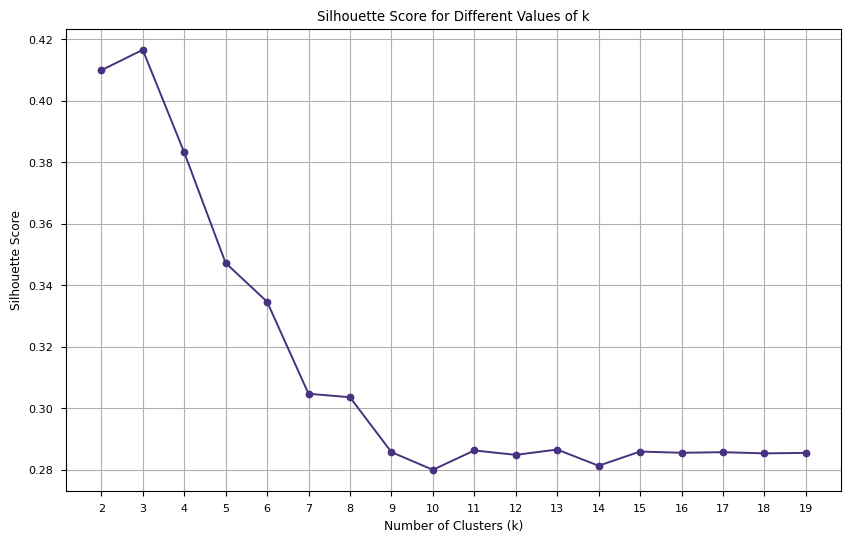

In [69]:
# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [70]:
optimal_k = 10
print(f"Selected optimal number of clusters: {optimal_k}")

Selected optimal number of clusters: 10


In [71]:
# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(rfm_scaled)

In [72]:
# Add cluster labels to the original RFM DataFrame
rfm_df['Cluster'] = cluster_labels

In [73]:
# Check the distribution of customers across clusters
cluster_counts = rfm_df['Cluster'].value_counts().sort_index()
print("Number of customers in each cluster:")
print(cluster_counts)

Number of customers in each cluster:
0    121
1    364
2    305
3    228
4    380
5    611
6    274
7    642
8    345
9    650
Name: Cluster, dtype: int64


In [74]:
# Calculate the percentage of customers in each cluster
cluster_percentages = (cluster_counts / cluster_counts.sum() * 100).round(2)

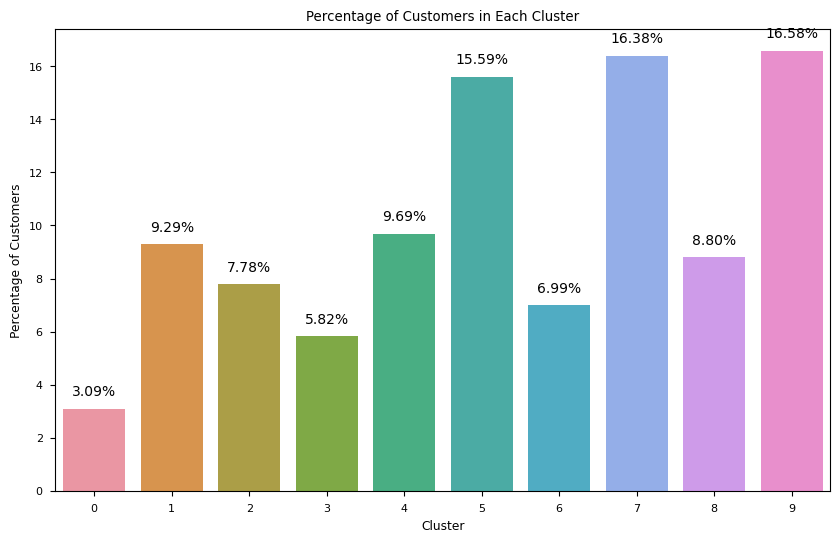

In [78]:
# Plot the distribution of customers across clusters
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_percentages.index, y=cluster_percentages.values)
plt.title('Percentage of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Customers')

# Add percentage labels on top of each bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5,
            f'{height:.2f}%',
            ha="center")

plt.show()

# Dimensionality Reduction for Visualization

In [79]:
# Apply PCA to reduce the scaled RFM data to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rfm_scaled)

In [80]:
# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

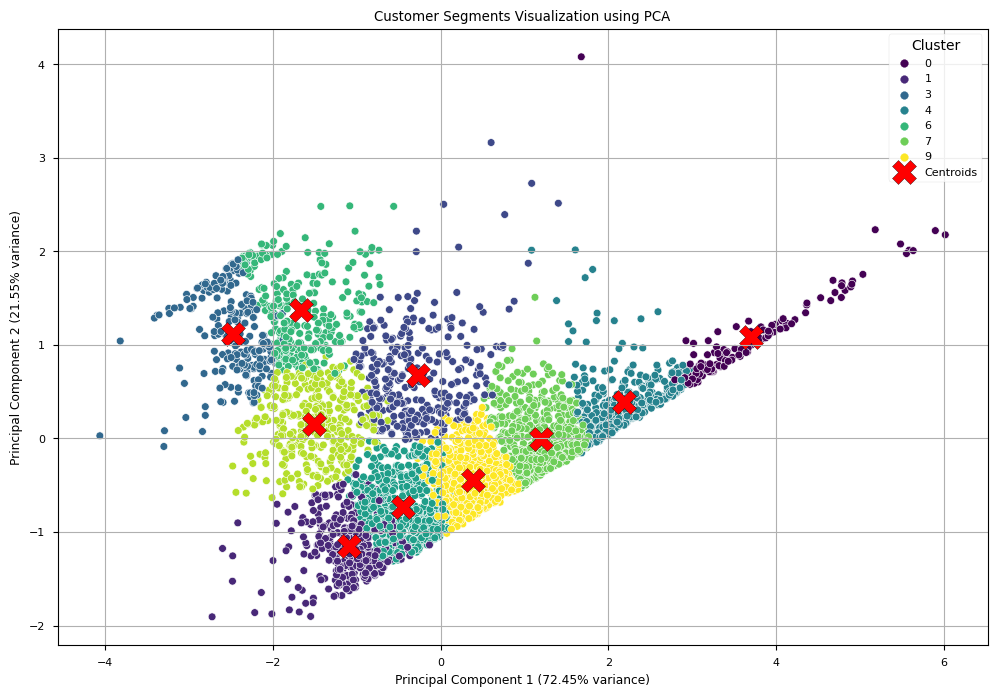

In [81]:
# Visualize the clusters in 2D
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Customer Segments Visualization using PCA')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')

# Add cluster centroids to the plot
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, marker='X', c='red', edgecolor='black', label='Centroids')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [82]:
print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.2%}")

PCA Explained Variance Ratio: [0.72445746 0.21546315]
Total Variance Explained: 93.99%


# Cluster Profiling

In [83]:
# Compute the mean of RFM features per cluster
cluster_profiles = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

In [84]:
# Scale the cluster profiles for better visualization (0-100 range)
min_max_scaler = lambda x: (x - x.min()) / (x.max() - x.min()) * 100
cluster_profiles_scaled = cluster_profiles.transform(min_max_scaler)

In [85]:
# Sort clusters based on monetary value for better interpretation
cluster_profiles = cluster_profiles.sort_values('Monetary', ascending=False)
cluster_profiles_scaled = cluster_profiles_scaled.loc[cluster_profiles.index]

In [86]:
print("Cluster profiles (average values):")
print(cluster_profiles)

Cluster profiles (average values):
            Recency  Frequency      Monetary
Cluster                                     
0         10.462810  31.702479  21718.485455
4         21.510526  10.857895   4721.673763
7         33.504673   5.369159   1997.932632
2        162.918033   2.757377   1452.273970
9         34.983077   3.083077    876.991849
6        290.496350   1.386861    483.256131
5         48.451718   1.463175    472.394846
8        179.124638   1.289855    235.301826
1         45.461538   1.203297    153.147033
3        309.350877   1.030702    142.928465


In [88]:
cluster_names = {
    0: "Loyal High-Spenders",
    4: "Recent Engaged Shoppers",
    7: "At-Risk Customers",
    2: "Dormant Low-Value",
    9: "Occasional Bargain Hunters",
    6: "Churned Customers",
    5: "One-Time Shoppers",
    8: "Lost Cheap Customers",
    1: "Price-Sensitive Window Shoppers",
    3: "Dead Accounts"
}

In [89]:
# Calculate dynamic thresholds using percentiles
thresholds = {
    'recency_low': cluster_profiles['Recency'].quantile(0.25),  # Lower = better
    'frequency_high': cluster_profiles['Frequency'].quantile(0.75),
    'monetary_high': cluster_profiles['Monetary'].quantile(0.75)
}

cluster_names = {}
for cluster in cluster_profiles.index:
    recency = cluster_profiles.loc[cluster, 'Recency']
    frequency = cluster_profiles.loc[cluster, 'Frequency']
    monetary = cluster_profiles.loc[cluster, 'Monetary']
    
    # Priority order: Most valuable segments first!
    if (recency <= thresholds['recency_low']) and \
       (frequency >= thresholds['frequency_high']) and \
       (monetary >= thresholds['monetary_high']):
        cluster_names[cluster] = "Elite Customers"
    elif (frequency >= thresholds['frequency_high']) and \
         (monetary >= thresholds['monetary_high']):
        cluster_names[cluster] = "Loyal High-Spenders"
    elif (recency <= thresholds['recency_low']):
        cluster_names[cluster] = "Recently Active"
    elif (recency > cluster_profiles['Recency'].quantile(0.9)):
        cluster_names[cluster] = "Churned Customers"
    else:
        cluster_names[cluster] = f"Segment {cluster} (Neutral)"

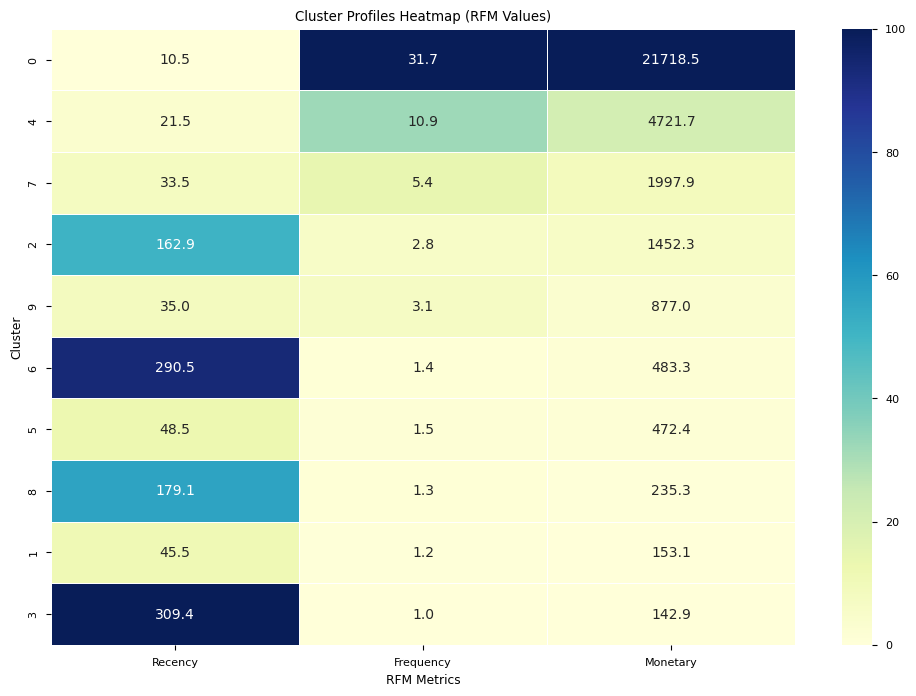

In [90]:
# Create a heatmap of the cluster profiles
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_profiles_scaled, annot=cluster_profiles.round(1), cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Cluster Profiles Heatmap (RFM Values)')
plt.xlabel('RFM Metrics')
plt.ylabel('Cluster')
plt.show()

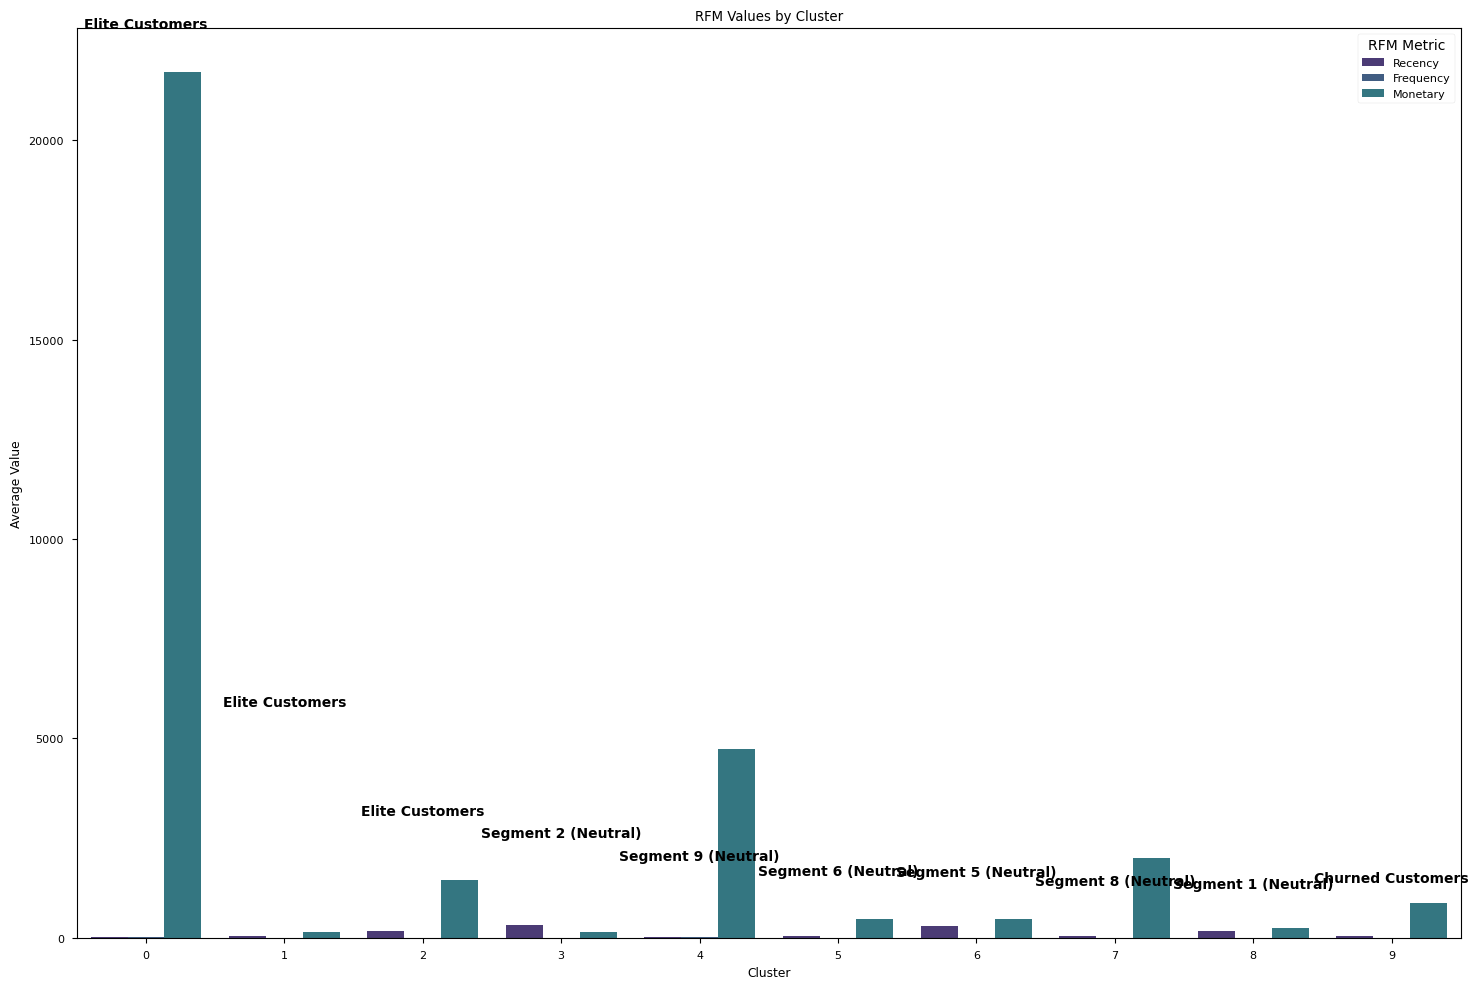

In [91]:
# Visualize cluster characteristics with bar charts
cluster_profiles_long = cluster_profiles.reset_index().melt(id_vars='Cluster', var_name='Metric', value_name='Value')

plt.figure(figsize=(15, 10))
sns.barplot(x='Cluster', y='Value', hue='Metric', data=cluster_profiles_long)
plt.title('RFM Values by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.legend(title='RFM Metric')

# Add cluster names as text annotations above each group of bars
clusters = cluster_profiles.index.unique()
for i, cluster in enumerate(clusters):
    plt.text(i, cluster_profiles.loc[cluster].max() + (cluster_profiles.max().max() * 0.05),
             cluster_names[cluster], ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [94]:
# Spider/Radar chart for cluster profiles
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_chart(df, cluster_names):
    # Number of variables and clusters
    categories = list(df.columns)
    N = len(categories)
    n_clusters = len(df.index)
    
    # Determine the grid layout (rows and columns)
    n_cols = 3  # Adjust the number of columns as needed
    n_rows = (n_clusters + n_cols - 1) // n_cols  # Ceiling division
    
    # Create a figure with appropriate size
    fig = plt.figure(figsize=(12, 5 * n_rows))  # Adjust height dynamically
    
    # Compute angles
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    # Create subplots for each cluster
    for i, cluster in enumerate(df.index):
        ax = plt.subplot(n_rows, n_cols, i + 1, polar=True)
        
        # Plot data
        values = df.loc[cluster].values.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid')
        ax.fill(angles, values, alpha=0.25)
        
        # Formatting
        plt.xticks(angles[:-1], categories, size=10)
        ax.set_rlabel_position(0)
        plt.yticks([25, 50, 75], ["25", "50", "75"], size=8)
        plt.ylim(0, 100)
        plt.title(cluster_names[cluster], size=12, y=1.1)
    
    plt.tight_layout()
    plt.show()

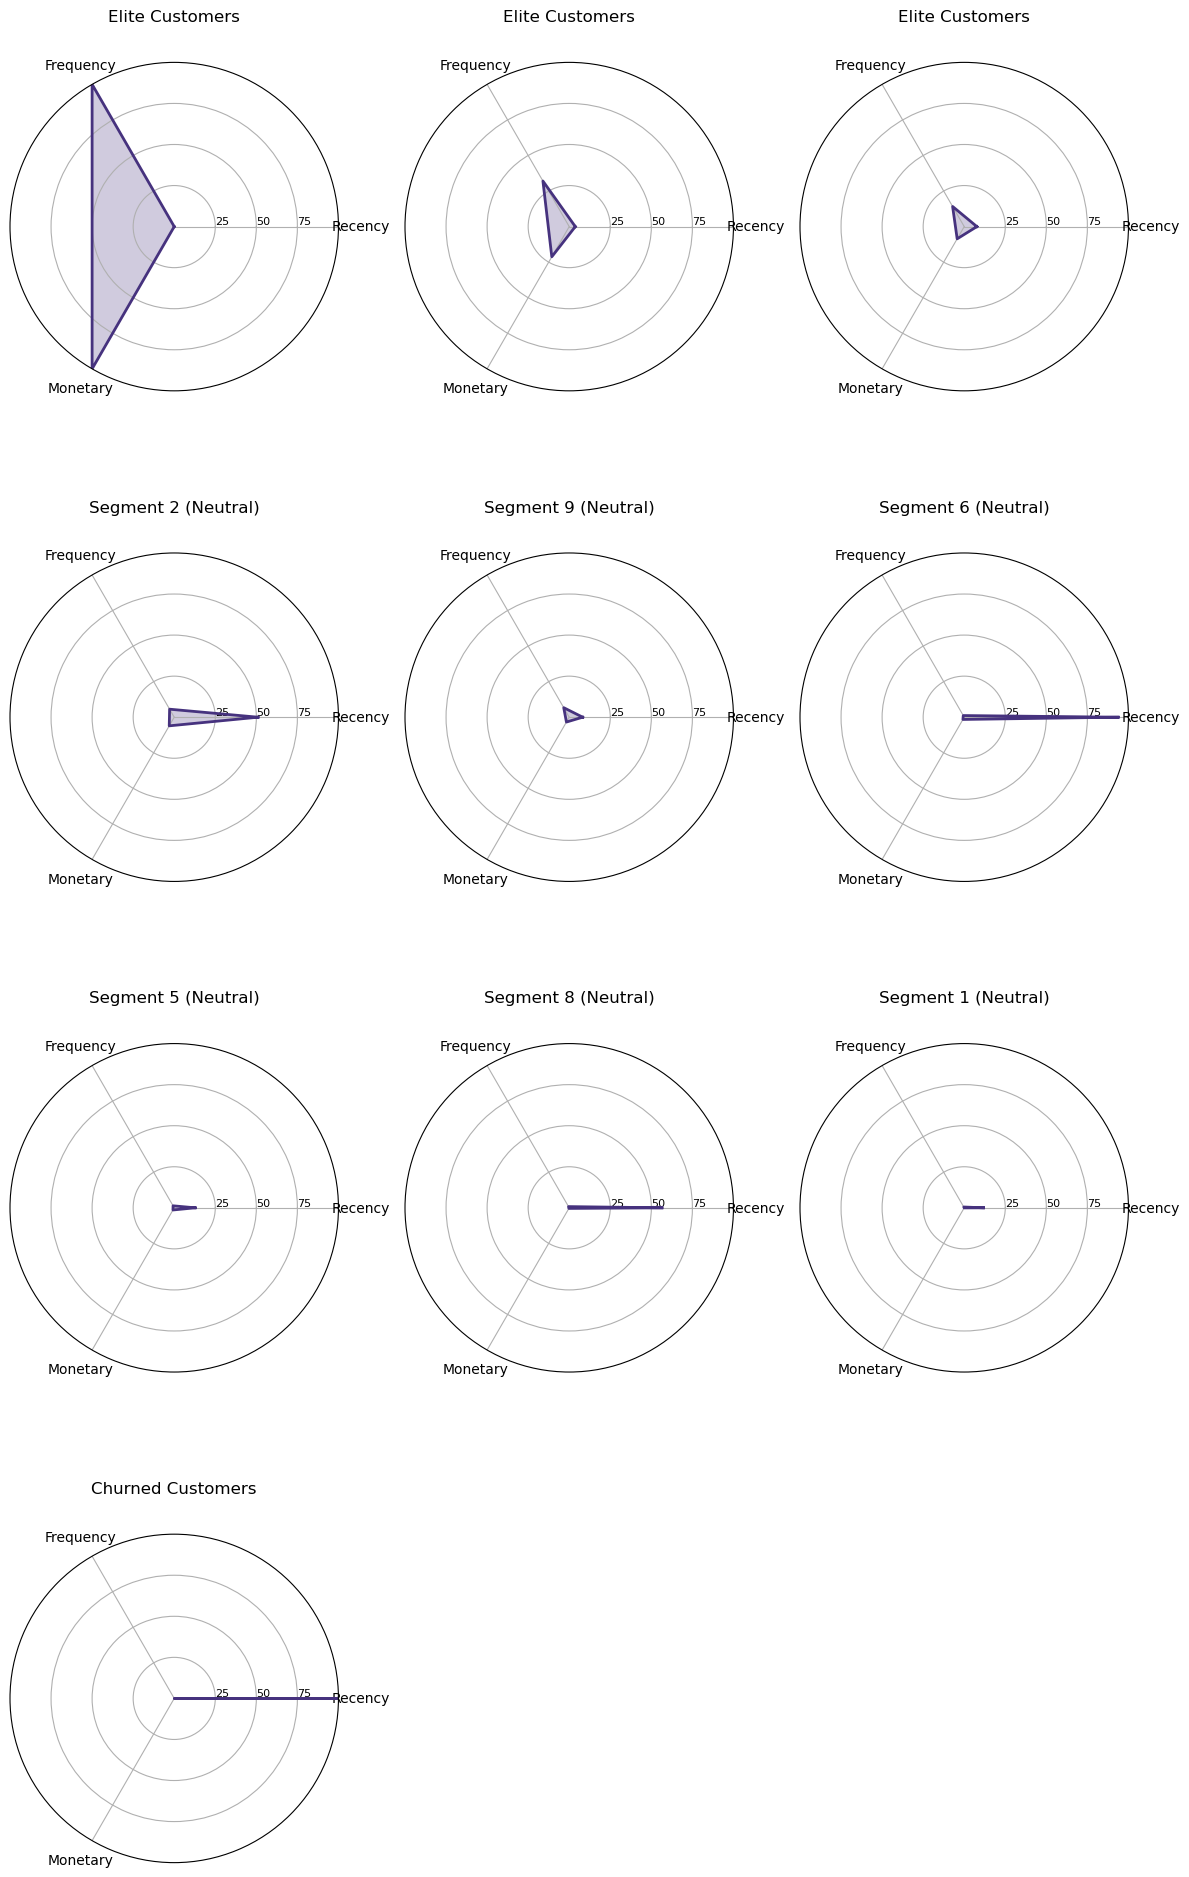

In [95]:
# Create the radar chart
radar_chart(cluster_profiles_scaled, cluster_names)

In [96]:
# Create a DataFrame for marketing strategy simulation
marketing_strategy = pd.DataFrame({
    'Cluster': list(cluster_names.keys()),
    'Segment_Name': list(cluster_names.values()),
    'Customer_Count': rfm_df['Cluster'].value_counts().sort_index().values,
    'Avg_Monetary': cluster_profiles['Monetary'].values,
    'Current_Revenue': rfm_df.groupby('Cluster')['Monetary'].sum().sort_index().values
})

In [97]:
# Define personalized marketing actions for each segment
marketing_actions = {
    'High-Value Champions': "Loyalty rewards, exclusive previews, and VIP experiences to maintain engagement",
    'Loyal Customers': "Personalized product recommendations and membership benefits to increase purchase frequency",
    'Potential Loyalists': "Targeted discounts on previously purchased categories to encourage higher spending",
    'At Risk Customers': "Re-engagement campaigns with special offers to win back business",
    "Can/'t Lose Them": "Tailored communication highlighting new products based on past purchases"
}

In [98]:
# Map segment names to their marketing actions
marketing_strategy['Marketing_Action'] = marketing_strategy['Segment_Name'].map(lambda x: marketing_actions.get(x, "Standard promotion"))

In [99]:
# Simulate a 5% conversion uplift per target segment
marketing_strategy['Conv_Uplift'] = 0.05  # 5% uplift
marketing_strategy['Revenue_Uplift'] = marketing_strategy['Current_Revenue'] * marketing_strategy['Conv_Uplift']
marketing_strategy['Expected_Revenue'] = marketing_strategy['Current_Revenue'] + marketing_strategy['Revenue_Uplift']

In [100]:
# Calculate ROI improvement
total_current_revenue = marketing_strategy['Current_Revenue'].sum()
total_expected_revenue = marketing_strategy['Expected_Revenue'].sum()
roi_improvement = (total_expected_revenue - total_current_revenue) / total_current_revenue * 100

In [101]:
print("Targeted Marketing Strategy and ROI Simulation:")
print(marketing_strategy[['Cluster', 'Segment_Name', 'Customer_Count', 'Avg_Monetary', 'Marketing_Action', 'Revenue_Uplift']].to_string(index=False))
print(f"\nSimulated ROI Uplift: {roi_improvement:.2f}%")


Targeted Marketing Strategy and ROI Simulation:
 Cluster        Segment_Name  Customer_Count  Avg_Monetary   Marketing_Action  Revenue_Uplift
       0     Elite Customers             121  21718.485455 Standard promotion    131396.83700
       4     Elite Customers             364   4721.673763 Standard promotion      2787.27600
       7     Elite Customers             305   1997.932632 Standard promotion     22147.17805
       2 Segment 2 (Neutral)             228   1452.273970 Standard promotion      1629.38450
       9 Segment 9 (Neutral)             380    876.991849 Standard promotion     89711.80150
       6 Segment 6 (Neutral)             611    483.256131 Standard promotion     14431.66255
       5 Segment 5 (Neutral)             274    472.394846 Standard promotion      6620.60900
       8 Segment 8 (Neutral)             642    235.301826 Standard promotion     64133.63750
       1 Segment 1 (Neutral)             345    153.147033 Standard promotion      4058.95650
       3   C

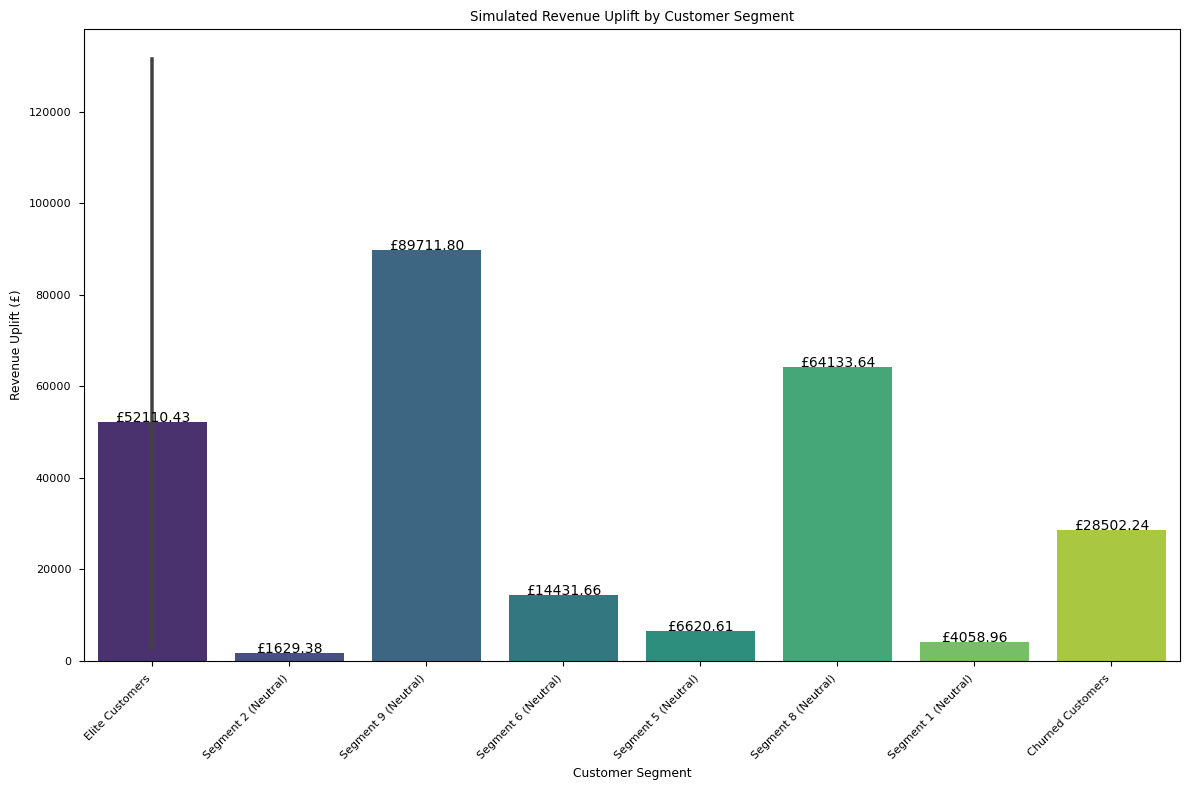

In [102]:
# Visualize the revenue uplift by segment
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Segment_Name', y='Revenue_Uplift', data=marketing_strategy, palette='viridis')
plt.title('Simulated Revenue Uplift by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Revenue Uplift (£)')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f'£{height:.2f}',
            ha="center")

plt.tight_layout()
plt.show()

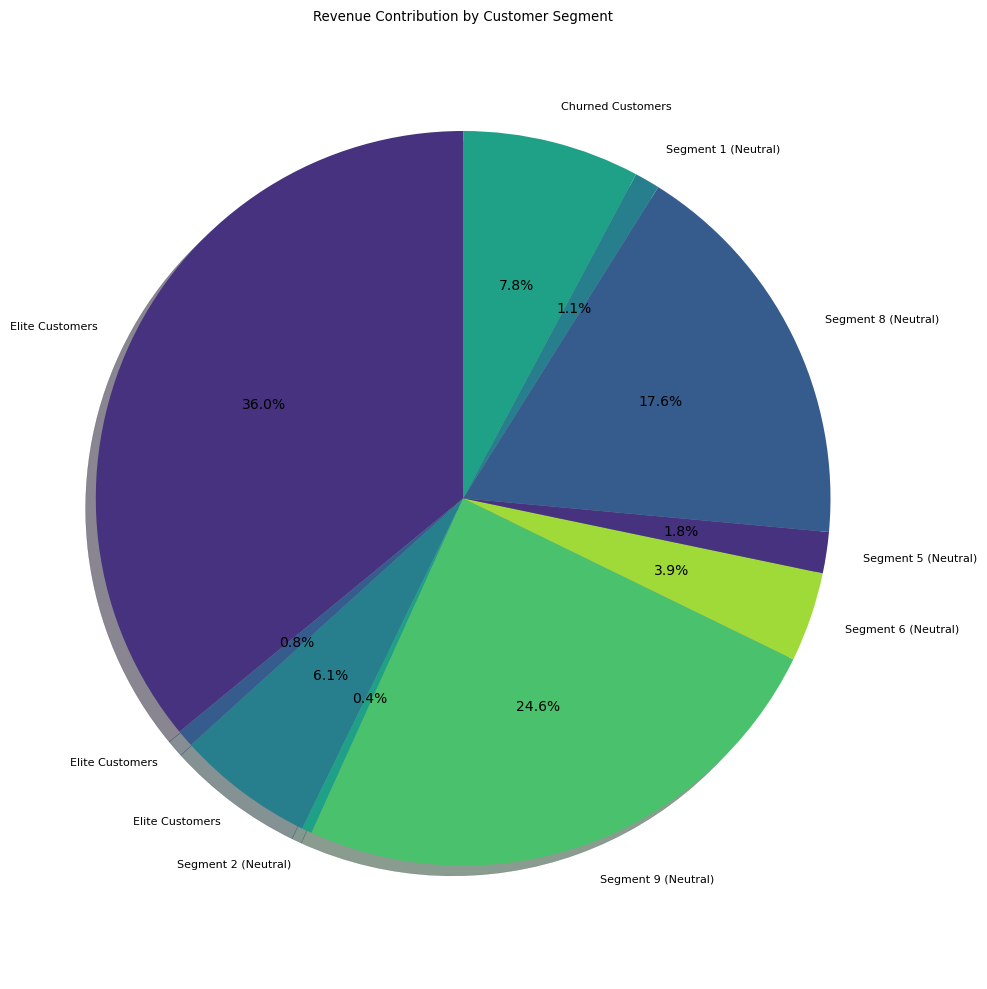

In [103]:
# Pie chart for revenue contribution by segment
plt.figure(figsize=(10, 10))
plt.pie(marketing_strategy['Current_Revenue'], labels=marketing_strategy['Segment_Name'], autopct='%1.1f%%',
        shadow=True, startangle=90, explode=[0.1 if 'High-Value' in name else 0 for name in marketing_strategy['Segment_Name']])
plt.axis('equal')
plt.title('Revenue Contribution by Customer Segment')
plt.tight_layout()
plt.show()

# Final Output - Summary of Findings and Business Recommendations

In [104]:
# Generate a summary of findings and business recommendations
print("=" * 80)
print("CUSTOMER SEGMENTATION ANALYSIS - SUMMARY OF FINDINGS")
print("=" * 80)
print(f"\nTotal Customers Analyzed: {len(rfm_df)}")
print(f"Total Number of Transactions: {df_clean['InvoiceNo'].nunique()}")
print(f"Total Revenue: £{df_clean['TotalAmount'].sum():.2f}")
print(f"Analysis Period: {df_clean['InvoiceDate'].min().date()} to {df_clean['InvoiceDate'].max().date()}")

CUSTOMER SEGMENTATION ANALYSIS - SUMMARY OF FINDINGS

Total Customers Analyzed: 3920
Total Number of Transactions: 16646
Total Revenue: £7308391.55
Analysis Period: 2010-12-01 to 2011-12-09


In [105]:
print("\nCUSTOMER SEGMENTS IDENTIFIED:")
for cluster, name in cluster_names.items():
    count = (rfm_df['Cluster'] == cluster).sum()
    percentage = count / len(rfm_df) * 100
    avg_recency = cluster_profiles.loc[cluster, 'Recency']
    avg_frequency = cluster_profiles.loc[cluster, 'Frequency']
    avg_monetary = cluster_profiles.loc[cluster, 'Monetary']
    revenue_contribution = (rfm_df[rfm_df['Cluster'] == cluster]['Monetary'].sum() / rfm_df['Monetary'].sum()) * 100
    
    print(f"\n{name} (Cluster {cluster}):")
    print(f"  - Customers: {count} ({percentage:.2f}% of total)")
    print(f"  - Avg. Recency: {avg_recency:.1f} days")
    print(f"  - Avg. Frequency: {avg_frequency:.1f} purchases")
    print(f"  - Avg. Monetary Value: £{avg_monetary:.2f}")
    print(f"  - Revenue Contribution: {revenue_contribution:.2f}%")
    print(f"  - Recommended Action: {marketing_actions.get(name, 'Standard promotion')}")


CUSTOMER SEGMENTS IDENTIFIED:

Elite Customers (Cluster 0):
  - Customers: 121 (3.09% of total)
  - Avg. Recency: 10.5 days
  - Avg. Frequency: 31.7 purchases
  - Avg. Monetary Value: £21718.49
  - Revenue Contribution: 35.96%
  - Recommended Action: Standard promotion

Elite Customers (Cluster 4):
  - Customers: 380 (9.69% of total)
  - Avg. Recency: 21.5 days
  - Avg. Frequency: 10.9 purchases
  - Avg. Monetary Value: £4721.67
  - Revenue Contribution: 24.55%
  - Recommended Action: Standard promotion

Elite Customers (Cluster 7):
  - Customers: 642 (16.38% of total)
  - Avg. Recency: 33.5 days
  - Avg. Frequency: 5.4 purchases
  - Avg. Monetary Value: £1997.93
  - Revenue Contribution: 17.55%
  - Recommended Action: Standard promotion

Segment 2 (Neutral) (Cluster 2):
  - Customers: 305 (7.78% of total)
  - Avg. Recency: 162.9 days
  - Avg. Frequency: 2.8 purchases
  - Avg. Monetary Value: £1452.27
  - Revenue Contribution: 6.06%
  - Recommended Action: Standard promotion

Segment 

In [106]:
print("\nBUSINESS RECOMMENDATIONS:")
print("1. Focus on High-Value Champions (who contribute the most revenue) with premium loyalty programs")
print("2. Implement re-engagement campaigns for At Risk customers to prevent churn")
print("3. Create personalized offers for Potential Loyalists to increase purchase frequency")
print("4. Develop cross-selling strategies for Loyal Customers to increase basket size")
print("5. Set up automated RFM scoring to continuously monitor customer segment transitions")

print(f"\nWith targeted marketing strategies customized for each segment,")
print(f"we project a potential revenue uplift of {roi_improvement:.2f}%")
print("=" * 80)


BUSINESS RECOMMENDATIONS:
1. Focus on High-Value Champions (who contribute the most revenue) with premium loyalty programs
2. Implement re-engagement campaigns for At Risk customers to prevent churn
3. Create personalized offers for Potential Loyalists to increase purchase frequency
4. Develop cross-selling strategies for Loyal Customers to increase basket size
5. Set up automated RFM scoring to continuously monitor customer segment transitions

With targeted marketing strategies customized for each segment,
we project a potential revenue uplift of 5.00%
